# $Multiple\;Linear\;Regression$

# Question-1(50_Startups)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [11]:
#import dataset
data=pd.read_csv('D://Assignment//Assignment-5//50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# EDA

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [14]:
data1=data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
data1

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [15]:
data1[data1.duplicated()]
# No duplicated data

,RDS,ADMS,MKTS,State,Profit


In [16]:
data1.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Correlation Analysis

In [17]:
data1.corr()  
#to find correlation

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


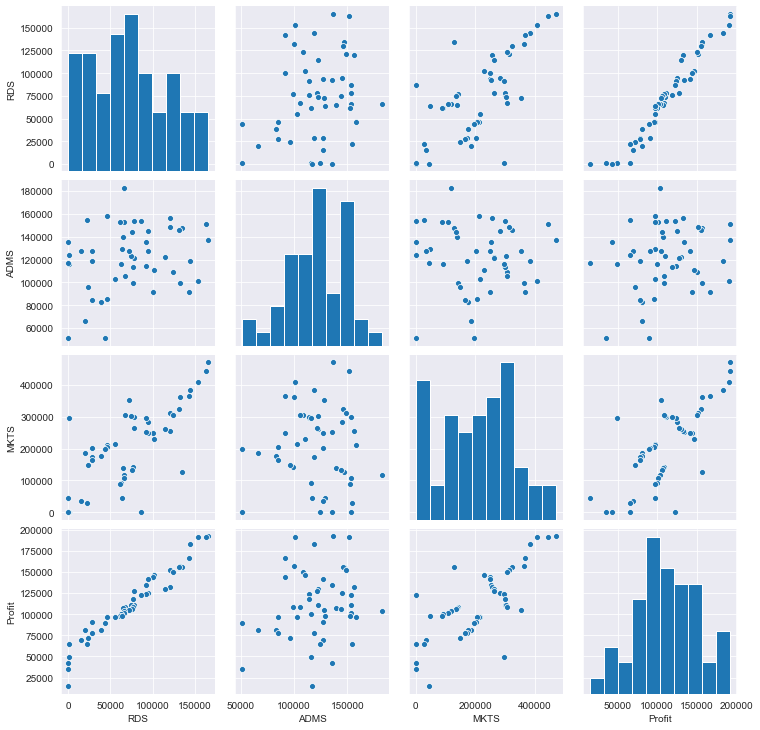

In [18]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

# Model Building

In [19]:
model=smf.ols("Profit~RDS+ADMS+MKTS",data=data1).fit()

# Model Testing

In [20]:
# Finding Coefficient parameters
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [21]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept     7.626218
 RDS          17.846374
 ADMS         -0.525507
 MKTS          1.655077
 dtype: float64,
 Intercept    0.00000
 RDS          0.00000
 ADMS         0.60176
 MKTS         0.10472
 dtype: float64)

In [22]:
# Finding rsquared values
model.rsquared , model.rsquared_adj  # Model accuracy is 94.75%

(0.9507459940683246, 0.9475337762901719)

In [24]:
# Build SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'
# Also find their tvalues and pvalues
slr_a=smf.ols("Profit~ADMS",data=data1).fit()
slr_a.tvalues,slr_a.pvalues  # ADMS has in-significant pvalue

(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

In [25]:
slr_m=smf.ols("Profit~MKTS",data=data1).fit()
slr_m.tvalues , slr_m.pvalues  # MKTS has significant pvalue

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [26]:
mlr_am=smf.ols("Profit~ADMS+MKTS",data=data1).fit()
mlr_am.tvalues , mlr_am.pvalues  # varaibles have significant pvalues

(Intercept    1.142741
 ADMS         2.467779
 MKTS         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMS         1.729198e-02
 MKTS         9.727245e-11
 dtype: float64)

# Model Validation

# Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [27]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RDS~ADMS+MKTS",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=data1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=data1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


In [28]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

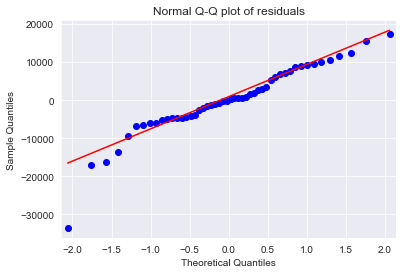

In [29]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [30]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [31]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

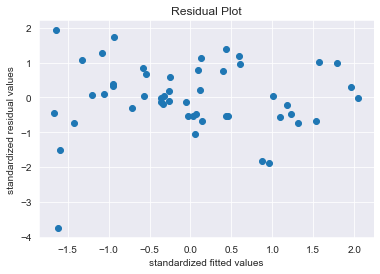

In [32]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In [33]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

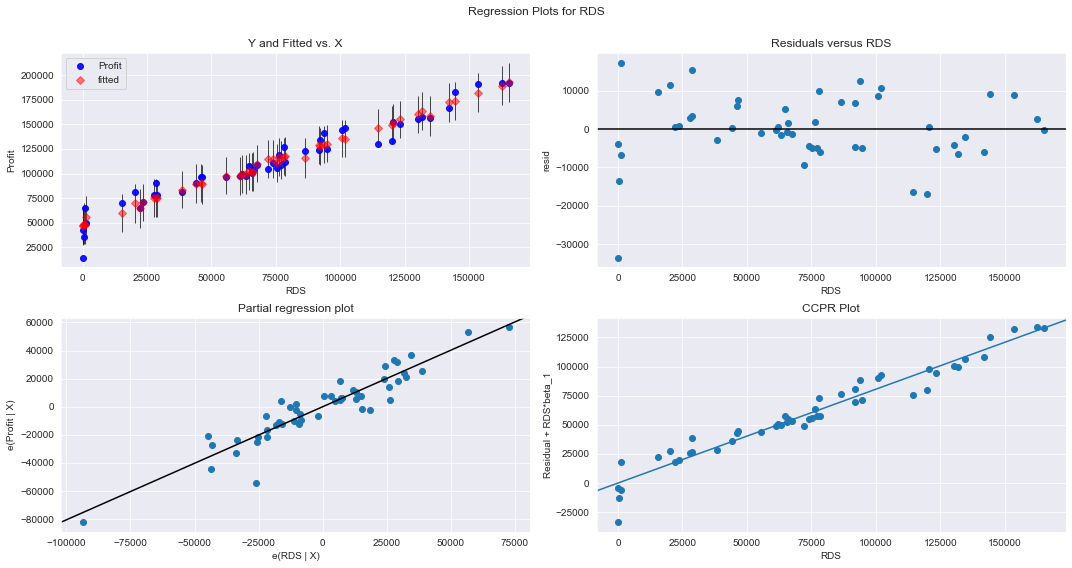

In [34]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

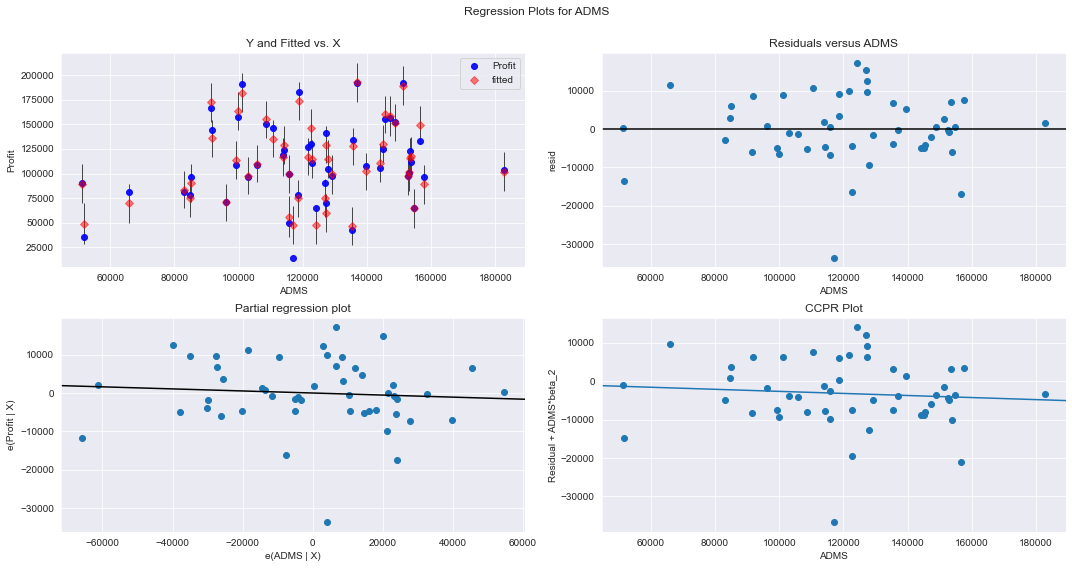

In [35]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)
plt.show()

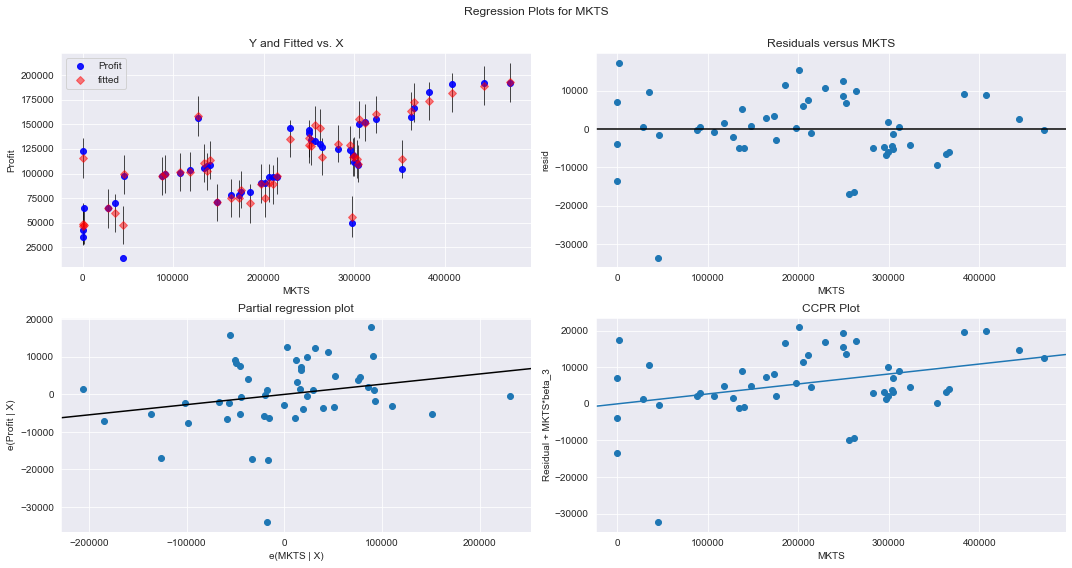

In [36]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)

# Two Techniques : 1. Cook's Distance & 2. Leverage value

In [37]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

<ipython-input-38-099d41a6999a>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data1)),np.round(c,5))


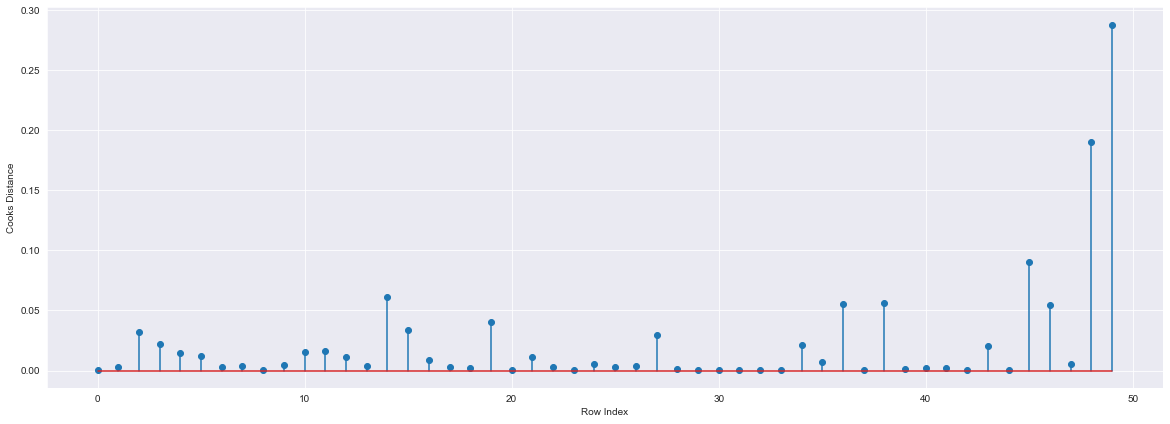

In [38]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [39]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.28808229275432623)

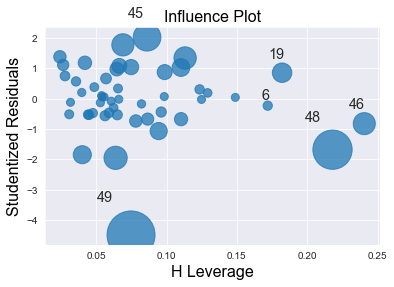

In [40]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [41]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [43]:
data1[data1.index.isin([49])]

,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


Improving the model

In [44]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Deletion Diagnostics and Final Model

In [45]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [46]:
final_model.rsquared

0.9613162435129847

In [47]:
data2

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Predictions

In [48]:
# say New data for prediction is
new_data=pd.DataFrame({'RDS':70000,"ADMS":90000,"MKTS":140000},index=[0])
new_data

,RDS,ADMS,MKTS
0,70000,90000,140000


In [49]:
# Manual Prediction of Price
final_model.predict(new_data)

0    108727.154753
dtype: float64

In [50]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(data2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

# table containing R^2 value for each prepared model

In [51]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316


# Question-2(Toyota Corolla)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
toyota=pd.read_csv(r"D://Assignment//Multiple Linear Regression//ToyotaCorolla.csv", encoding = 'unicode_escape')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
toyota.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [5]:
toyota.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [6]:
toyota1 = toyota.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [7]:
toyota1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
toyota2 = toyota1.rename({'Age_08_04':'Age','Quarterly_Tax':'QT'},axis = 1)

In [9]:
toyota2.head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [10]:
toyota2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [11]:
toyota2.isnull().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

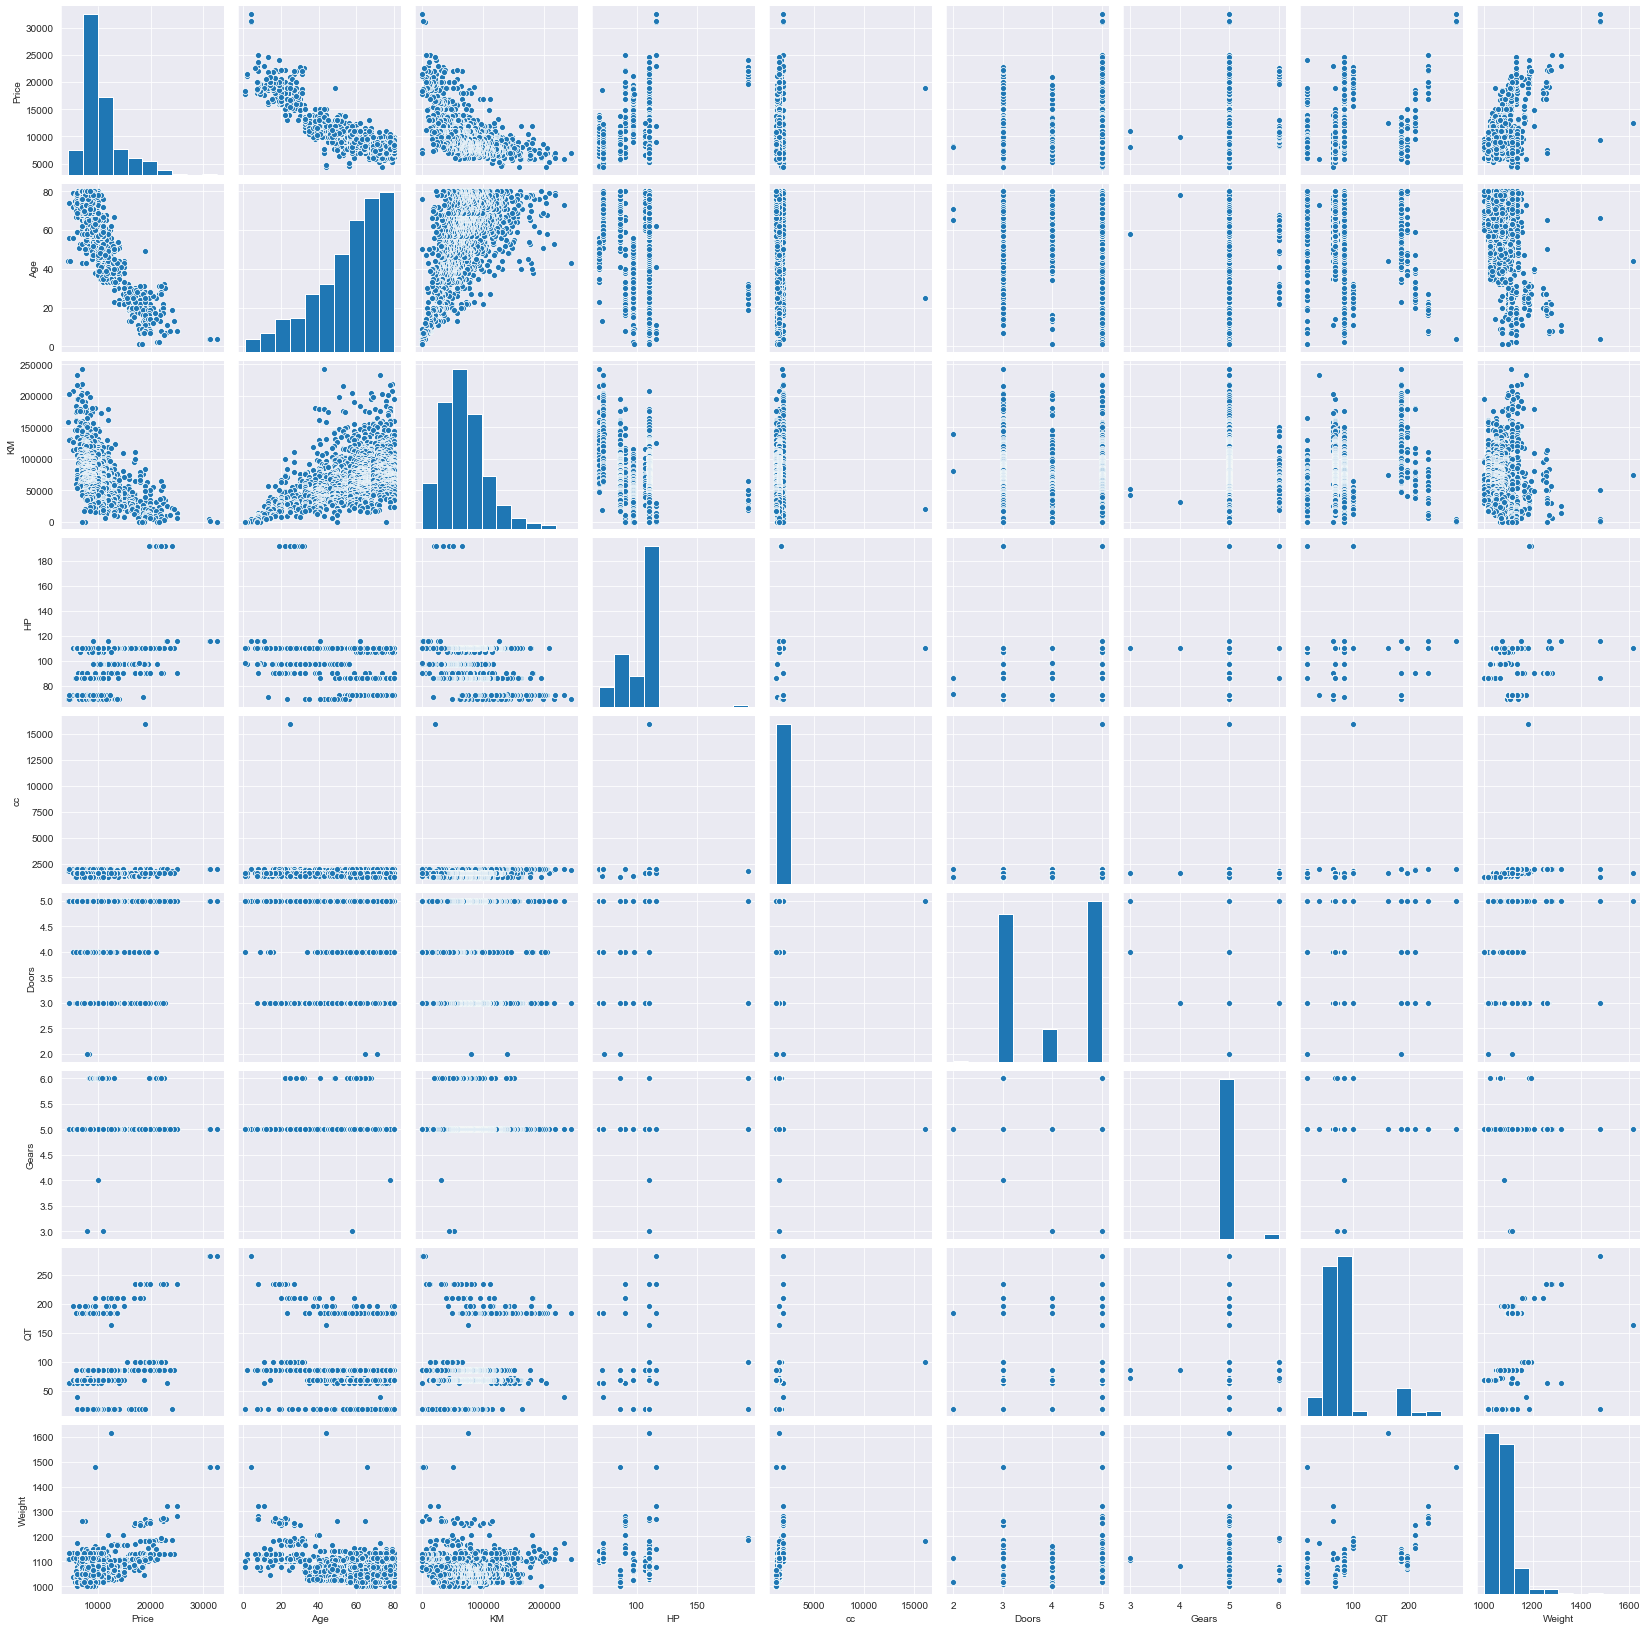

In [12]:
sns.set_style(style = 'darkgrid')
sns.pairplot(toyota2)

In [13]:
model = toyota2.drop(['Doors','Gears'],axis=1)

In [14]:
model

,Price,Age,KM,HP,cc,QT,Weight
0,13500,23,46986,90,2000,210,1165
1,13750,23,72937,90,2000,210,1165
2,13950,24,41711,90,2000,210,1165
3,14950,26,48000,90,2000,210,1165
4,13750,30,38500,90,2000,210,1170
...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,69,1025
1432,10845,72,19000,86,1300,69,1015
1433,8500,71,17016,86,1300,69,1015
1434,7250,70,16916,86,1300,69,1015


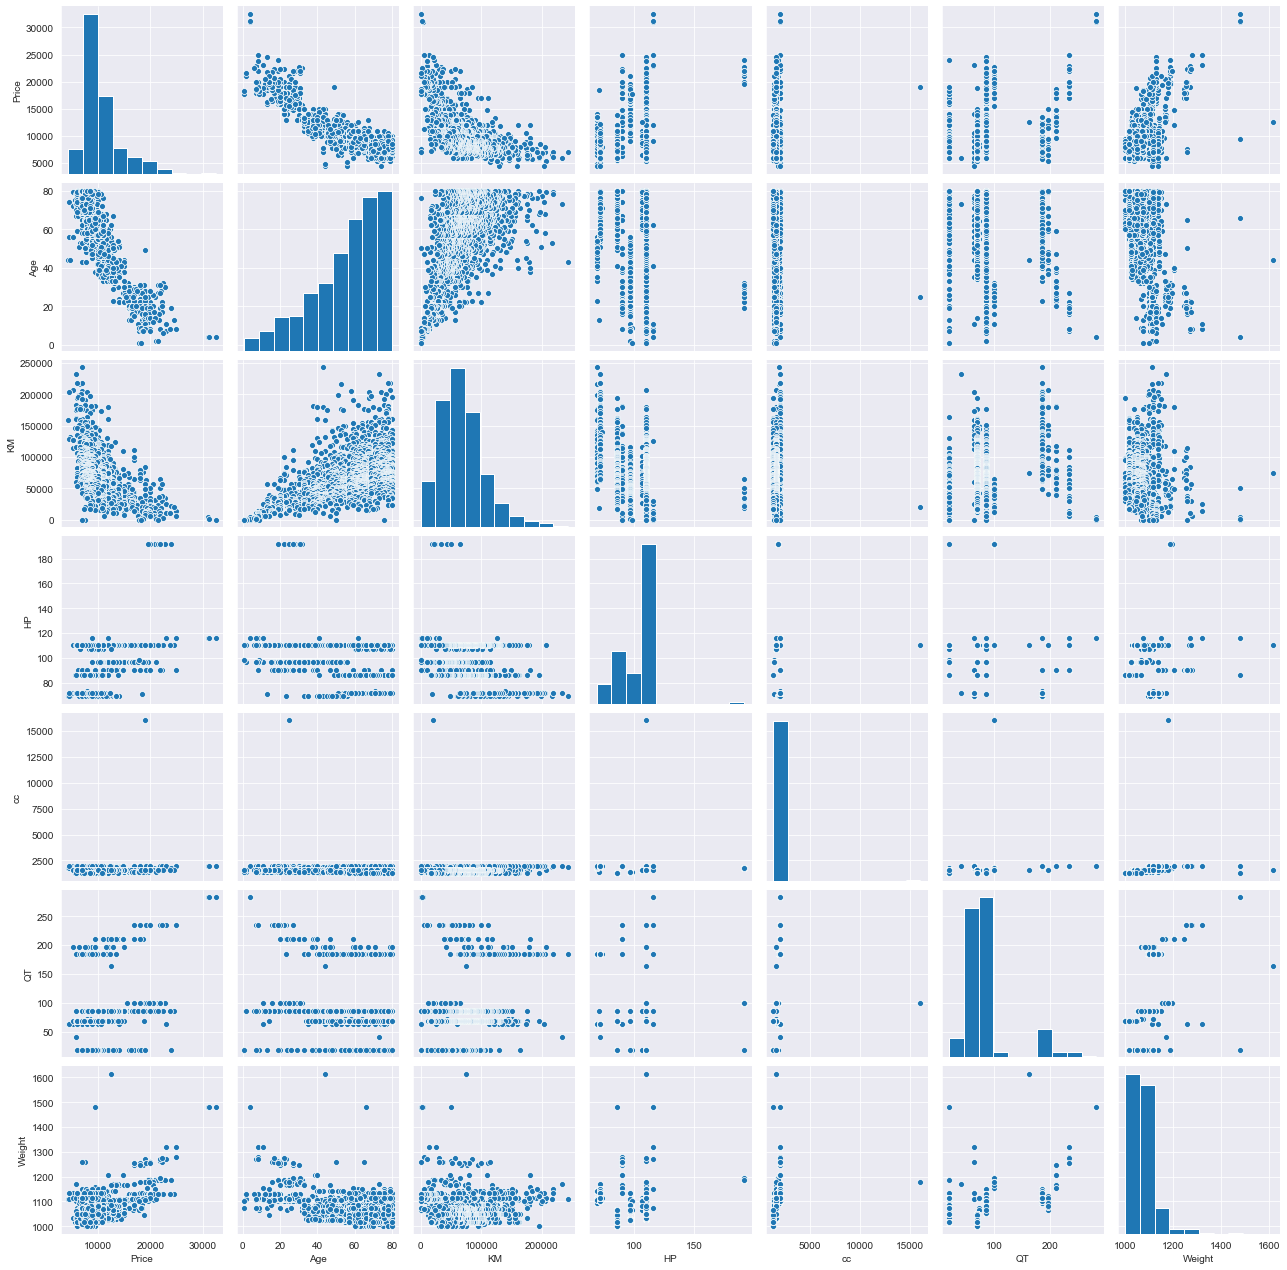

In [15]:
sns.set_style(style='darkgrid')
sns.pairplot(model)

In [16]:
model1 = smf.ols('Price~Age+KM+HP+cc+QT+Weight',data = model).fit()
model1.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000002DFDFF6E400>>

In [17]:
model1.params

Intercept   -2669.484315
Age          -121.792943
KM             -0.020546
HP             33.685785
cc             -0.124385
QT              4.192242
Weight         16.815621
dtype: float64

In [18]:
print(model1.tvalues, '\n', model1.pvalues)

Intercept    -2.539366
Age         -46.448533
KM          -16.410631
HP           12.287927
cc           -1.377358
QT            3.206525
Weight       16.238939
dtype: float64 
 Intercept     1.121062e-02
Age          7.864089e-288
KM            1.400419e-55
HP            4.599946e-33
cc            1.686173e-01
QT            1.373227e-03
Weight        1.499666e-54
dtype: float64


In [19]:
(model1.rsquared,model1.rsquared_adj)

(0.8628570632699419, 0.8622812356839515)

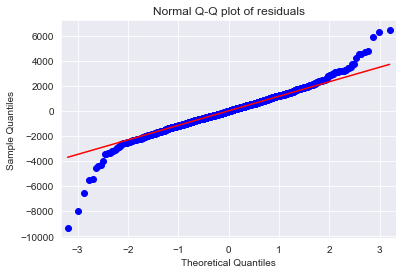

In [20]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [21]:
list(np.where(model1.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  126,
         127,  128,  134,  136,  138,  139,  141,  142,  143,  144,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  156,  157,  158,
         159,  160,  161,  162,  163,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  190,  194,  196,  197,  201,  204,  210,  211,  216,
         223,  230,  232,  233,  237, 

In [22]:
ml_cc = smf.ols('Price~cc',data=model).fit()
print(ml_cc.tvalues, '\n', ml_cc.pvalues) 

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [23]:
ml_qt = smf.ols('Price~QT',data=model).fit()
print(ml_qt.tvalues, '\n', ml_qt.pvalues) 

Intercept    41.330311
QT            8.507487
dtype: float64 
 Intercept    1.532168e-246
QT            4.407393e-17
dtype: float64


In [24]:
ml_cc_qt=smf.ols('Price~cc+QT',data = model).fit()  
print(ml_cc_qt.tvalues, '\n', ml_cc_qt.pvalues)

Intercept    22.397125
cc            2.414097
QT            7.369169
dtype: float64 
 Intercept    1.654934e-95
cc           1.589894e-02
QT           2.888785e-13
dtype: float64


In [25]:
r_age = smf.ols('Age~KM+HP+cc+QT+Weight',data=model).fit().rsquared
vif_age = 1/(1-r_age)

r_km = smf.ols('KM~Age+HP+cc+QT+Weight',data=model).fit().rsquared
vif_km = 1/(1-r_km)

r_cc = smf.ols('cc~Age+HP+KM+QT+Weight',data=model).fit().rsquared
vif_cc = 1/(1-r_cc)


r_QT = smf.ols('QT~Age+HP+KM+cc+Weight',data=model).fit().rsquared
vif_QT = 1/(1-r_QT)

r_weight = smf.ols('Weight~Age+HP+KM+cc+QT',data=model).fit().rsquared
vif_weight = 1/(1-r_weight)

d1 = {'Variables': ['Age','KM','cc','QT','Weight'],'VIF':[vif_age,vif_km,vif_cc,vif_QT,vif_weight]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,Age,1.884073
1,KM,1.746582
2,cc,1.163426
3,QT,2.290254
4,Weight,2.353601


In [26]:
model1r = model1.resid
model1r

0      -3317.422641
1      -2534.232763
2      -2854.009977
3      -1481.210143
4      -2473.303708
           ...     
1431   -1265.258578
1432    2581.553403
1433      73.997148
1434   -1299.850398
1435   -3442.906500
Length: 1436, dtype: float64

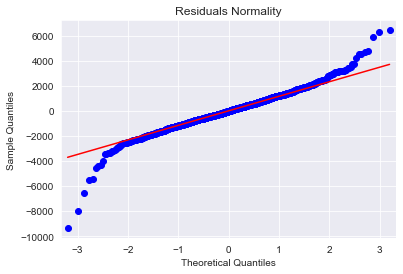

In [27]:
import statsmodels.api as smf
qq_plot = smf.qqplot(model1r , line='q')
plt.title("Residuals Normality")
plt.show()

In [28]:
list(np.where(model1r>6000))

[array([147, 523], dtype=int64)]

In [29]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

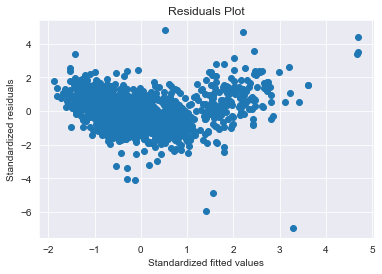

In [30]:
plt.scatter(get_standardized_values(model1.fittedvalues),
           get_standardized_values(model1.resid))
plt.title("Residuals Plot")
plt.xlabel("Standardized fitted values")
plt.ylabel("Standardized residuals")
plt.show()

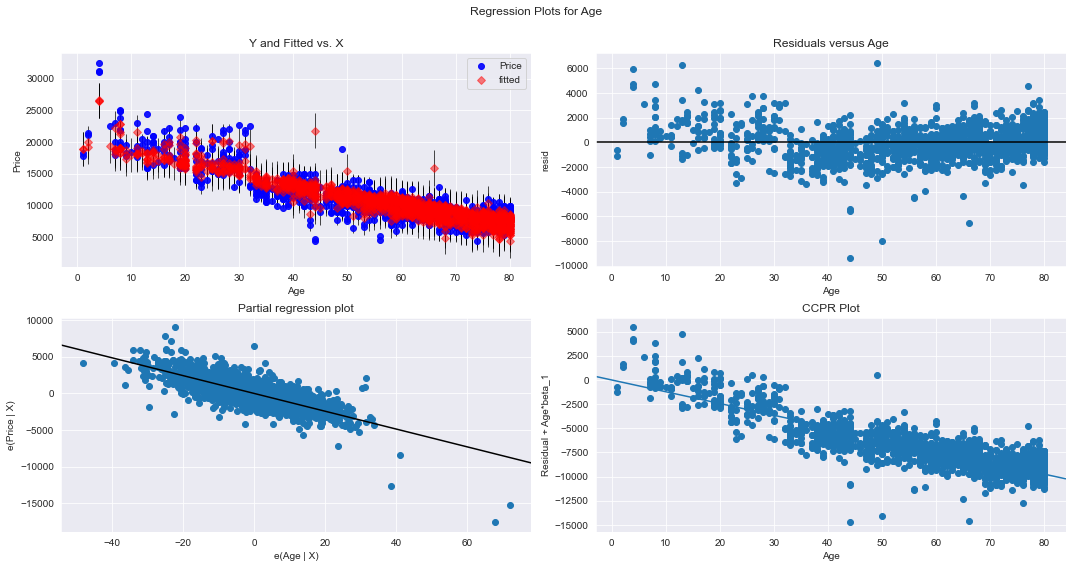

In [31]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model1,"Age",fig=fig)

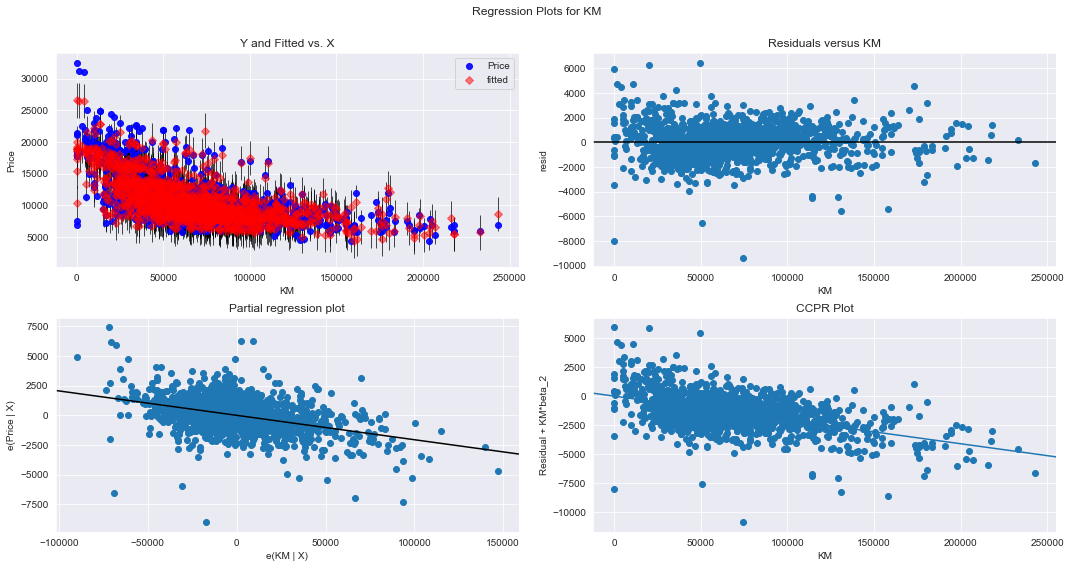

In [32]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model1,"KM",fig=fig)

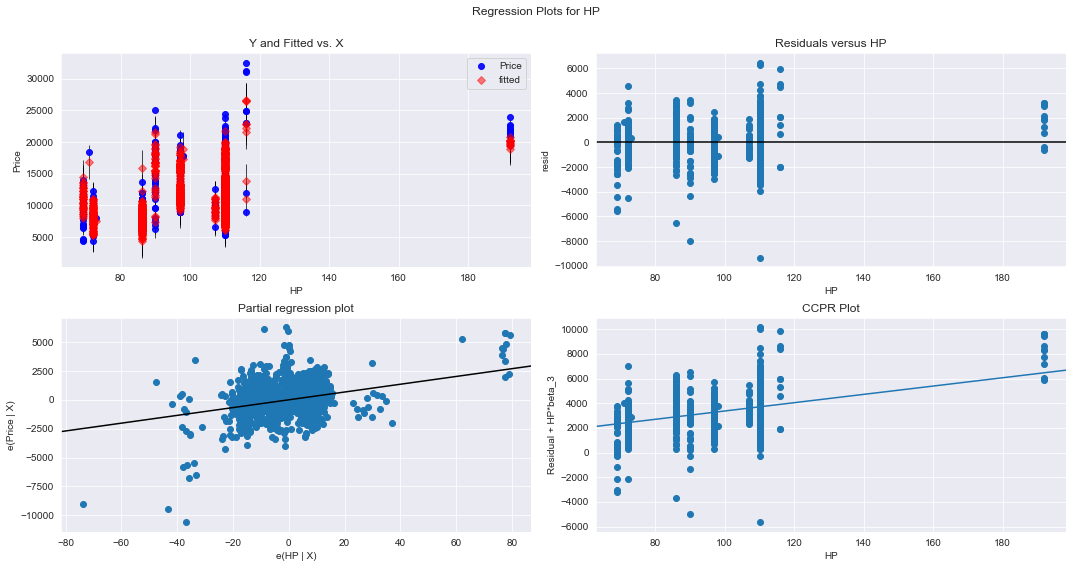

In [33]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model1,"HP",fig=fig)

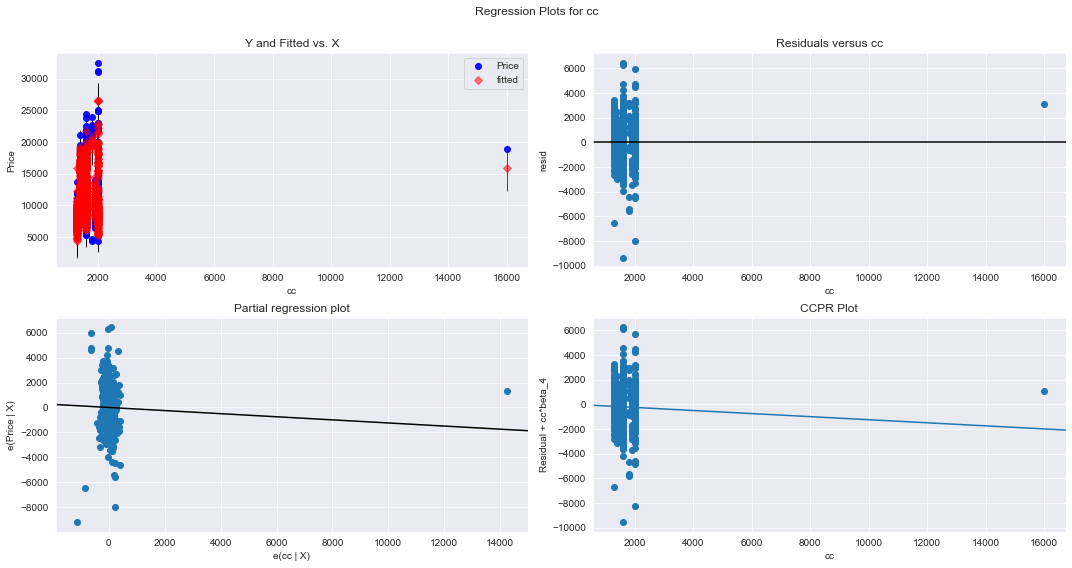

In [34]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model1,"cc",fig=fig)

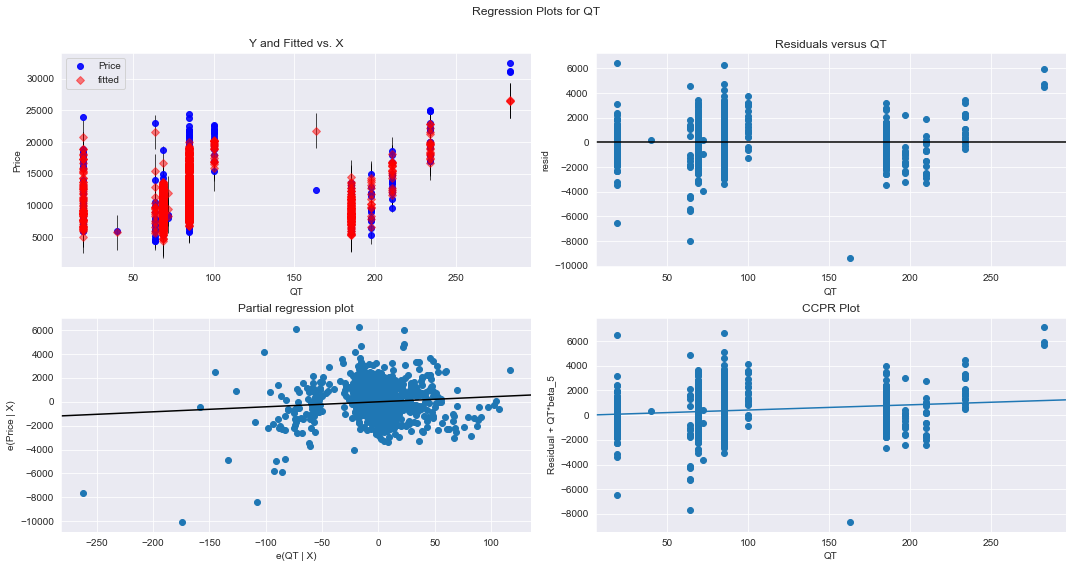

In [35]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model1,"QT",fig=fig)

In [36]:
model_influence = model1.get_influence()
(c,_) = model_influence.cooks_distance

In [37]:
c

array([7.94634117e-03, 4.31088094e-03, 6.02396204e-03, ...,
       2.67194643e-06, 8.05624057e-04, 1.35714526e-02])

<ipython-input-38-d20bd675c6a7>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(model)),np.round(c,3))


Text(0, 0.5, 'Cooks Distance')

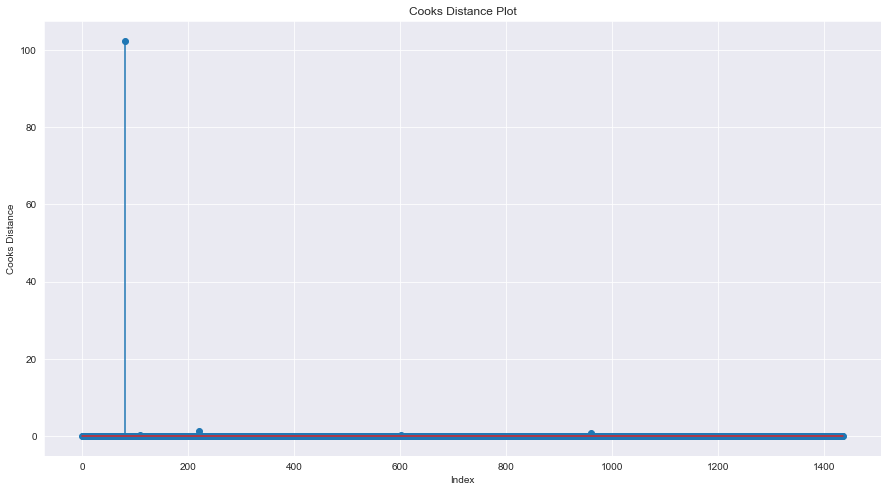

In [38]:
figure = plt.figure(figsize =(15,8))
plt.stem(np.arange(len(model)),np.round(c,3))
plt.title("Cooks Distance Plot")
plt.xlabel("Index")
plt.ylabel("Cooks Distance")

In [39]:
np.argmax(c),np.max(c)

(80, 102.42006677698339)

In [40]:
from statsmodels.graphics.regressionplots import influence_plot

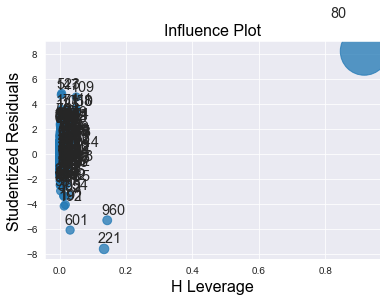

In [41]:
influence_plot(model1)
plt.show()

In [42]:
k = model.shape[1]
n = model.shape[0]
leverage_cutoff = (3*(k+1)/n)

In [43]:
leverage_cutoff

0.016713091922005572

In [44]:
model2 = model.drop(model.index[[80]],axis = 0).reset_index()

In [45]:
model2

,index,Price,Age,KM,HP,cc,QT,Weight
0,0,13500,23,46986,90,2000,210,1165
1,1,13750,23,72937,90,2000,210,1165
2,2,13950,24,41711,90,2000,210,1165
3,3,14950,26,48000,90,2000,210,1165
4,4,13750,30,38500,90,2000,210,1170
...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,69,1025
1431,1432,10845,72,19000,86,1300,69,1015
1432,1433,8500,71,17016,86,1300,69,1015
1433,1434,7250,70,16916,86,1300,69,1015


In [46]:
model3 = model2.drop(['index'],axis=1)

In [47]:
model3

,Price,Age,KM,HP,cc,QT,Weight
0,13500,23,46986,90,2000,210,1165
1,13750,23,72937,90,2000,210,1165
2,13950,24,41711,90,2000,210,1165
3,14950,26,48000,90,2000,210,1165
4,13750,30,38500,90,2000,210,1170
...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,69,1025
1431,10845,72,19000,86,1300,69,1015
1432,8500,71,17016,86,1300,69,1015
1433,7250,70,16916,86,1300,69,1015


In [48]:
import statsmodels.formula.api as smf
final_ml_cc = smf.ols('Price~Age+KM+HP+cc+QT+Weight',data = model3).fit()
final_ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1573.
Date:                Sun, 28 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:31:32   Log-Likelihood:                -12339.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1428   BIC:                         2.473e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3643.4063   1034.489     -3.522      0.000   -5672.688   -1614.124
Age         -120.5692      2.568    -46.958      0.000    -125.606    -115.532
KM            -0.0176      0.001    -13.812      0.000      -0.020      -0.015
HP            41.0948      2.828     14.532      0.000      35.548      46.642
cc            -2.5355      0.307     -8.264      0.000      -3.137      -1.934
QT             9.3512      1.424      6.565      0.000       6.557      12.145
Weight        19.8727      1.079     18.423      0.000      17.757      21.989
==============================================================================
Omnibus:                      238.534   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2475.164
Skew:                          -0.431   Prob(JB):                         0.00
Kurtosis:                       9.376   Cond. No.                     2.33e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
import statsmodels.formula.api as smf
final_ml_qt = smf.ols('Price~Age+KM+HP+QT+Weight',data = model3).fit()
final_ml_qt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1789.
Date:                Sun, 28 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:31:46   Log-Likelihood:                -12373.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1429   BIC:                         2.479e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2509.8635   1049.222     -2.392      0.017   -4568.045    -451.682
Age         -121.8232      2.623    -46.448      0.000    -126.968    -116.678
KM            -0.0206      0.001    -16.525      0.000      -0.023      -0.018
HP            33.3669      2.731     12.218      0.000      28.010      38.724
QT             4.0029      1.298      3.083      0.002       1.456       6.550
Weight        16.5366      1.024     16.156      0.000      14.529      18.544
==============================================================================
Omnibus:                      143.306   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              902.103
Skew:                          -0.201   Prob(JB):                    1.29e-196
Kurtosis:                       6.863   Cond. No.                     2.31e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
model_influence1 = final_ml_cc.get_influence()
(c1,_)= model_influence1.cooks_distance

In [51]:
c1

array([7.46590503e-03, 3.91570024e-03, 5.43742321e-03, ...,
       1.33351891e-06, 1.03237734e-03, 1.21588637e-02])

<ipython-input-52-8e363ac63a4b>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(model3)),np.round(c1,3))


Text(0, 0.5, 'Cooks Distance')

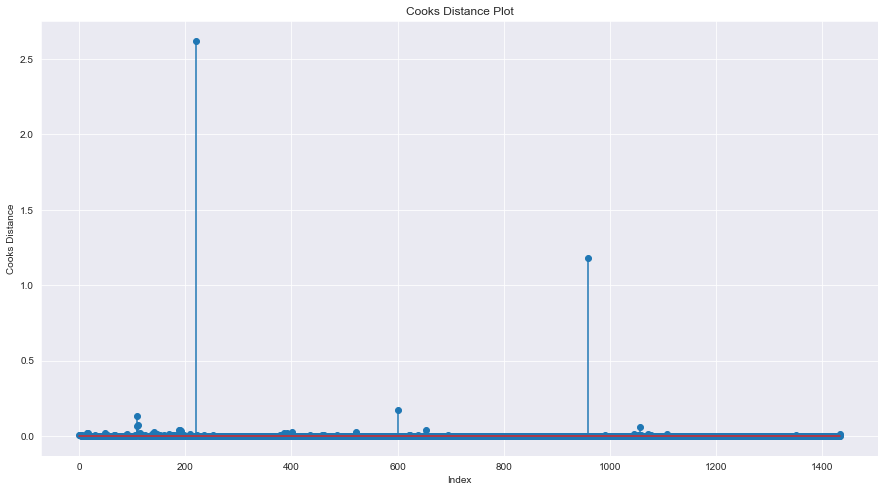

In [52]:
figure = plt.figure(figsize =(15,8))
plt.stem(np.arange(len(model3)),np.round(c1,3))
plt.title("Cooks Distance Plot")
plt.xlabel("Index")
plt.ylabel("Cooks Distance")

In [53]:
np.argmax(c1),np.max(c1)

(220, 2.621241661872396)

In [54]:
model4 = model3.drop(model3.index[[220]],axis = 0).reset_index()

In [55]:
model4

,index,Price,Age,KM,HP,cc,QT,Weight
0,0,13500,23,46986,90,2000,210,1165
1,1,13750,23,72937,90,2000,210,1165
2,2,13950,24,41711,90,2000,210,1165
3,3,14950,26,48000,90,2000,210,1165
4,4,13750,30,38500,90,2000,210,1170
...,...,...,...,...,...,...,...,...
1429,1430,7500,69,20544,86,1300,69,1025
1430,1431,10845,72,19000,86,1300,69,1015
1431,1432,8500,71,17016,86,1300,69,1015
1432,1433,7250,70,16916,86,1300,69,1015


In [56]:
model5 = model4.drop(['index'],axis=1)

In [57]:
model5

,Price,Age,KM,HP,cc,QT,Weight
0,13500,23,46986,90,2000,210,1165
1,13750,23,72937,90,2000,210,1165
2,13950,24,41711,90,2000,210,1165
3,14950,26,48000,90,2000,210,1165
4,13750,30,38500,90,2000,210,1170
...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,69,1025
1430,10845,72,19000,86,1300,69,1015
1431,8500,71,17016,86,1300,69,1015
1432,7250,70,16916,86,1300,69,1015


In [58]:
final_ml_cc = smf.ols('Price~Age+KM+HP+cc+QT+Weight',data = model5).fit()
final_ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1693.
Date:                Sun, 28 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:33:08   Log-Likelihood:                -12284.
No. Observations:                1434   AIC:                         2.458e+04
Df Residuals:                    1427   BIC:                         2.462e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7597.6576   1079.950     -7.035      0.000   -9716.117   -5479.198
Age         -116.7608      2.516    -46.399      0.000    -121.697    -111.824
KM            -0.0171      0.001    -13.848      0.000      -0.020      -0.015
HP            40.7754      2.738     14.890      0.000      35.404      46.147
cc            -3.1815      0.304    -10.455      0.000      -3.778      -2.585
QT             8.3344      1.383      6.026      0.000       5.621      11.048
Weight        24.3949      1.142     21.363      0.000      22.155      26.635
==============================================================================
Omnibus:                      178.461   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1399.901
Skew:                          -0.282   Prob(JB):                    1.04e-304
Kurtosis:                       7.807   Cond. No.                     2.51e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
final_ml_qt = smf.ols('Price~Age+KM+HP+QT+Weight',data = model5).fit()
final_ml_qt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1868.
Date:                Sun, 28 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:33:21   Log-Likelihood:                -12337.
No. Observations:                1434   AIC:                         2.469e+04
Df Residuals:                    1428   BIC:                         2.472e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5327.8512   1097.287     -4.855      0.000   -7480.318   -3175.384
Age         -119.1410      2.599    -45.834      0.000    -124.240    -114.042
KM            -0.0209      0.001    -17.003      0.000      -0.023      -0.018
HP            31.6076      2.691     11.746      0.000      26.329      36.886
QT             2.1736      1.298      1.675      0.094      -0.372       4.720
Weight        19.3599      1.074     18.027      0.000      17.253      21.467
==============================================================================
Omnibus:                      124.926   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              662.998
Skew:                          -0.190   Prob(JB):                    1.08e-144
Kurtosis:                       6.309   Cond. No.                     2.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
model_influence1 = final_ml_cc.get_influence()
(c2,_)= model_influence1.cooks_distance

In [61]:
c2

array([7.45231651e-03, 3.85932342e-03, 5.35334588e-03, ...,
       4.31615245e-07, 1.06112018e-03, 1.60620933e-02])

<ipython-input-62-50d6af18965b>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(model5)),np.round(c2,3))


Text(0, 0.5, 'Cooks Distance')

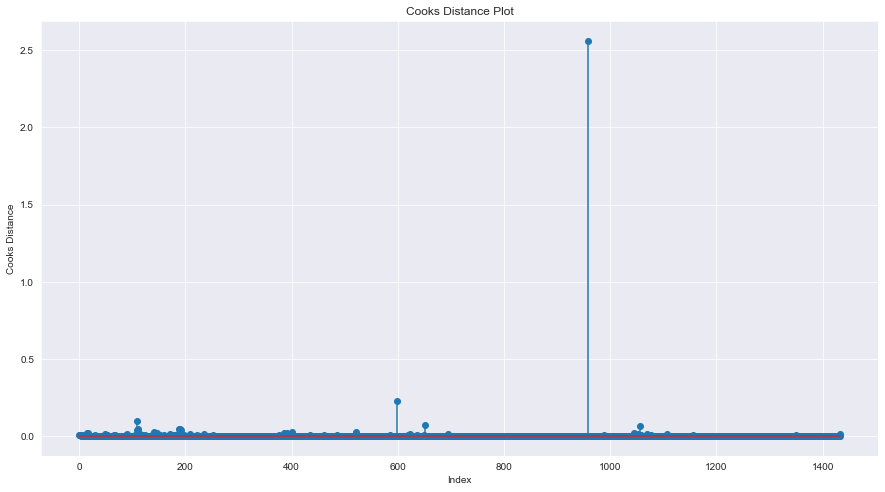

In [62]:
figure = plt.figure(figsize =(15,8))
plt.stem(np.arange(len(model5)),np.round(c2,3))
plt.title("Cooks Distance Plot")
plt.xlabel("Index")
plt.ylabel("Cooks Distance")

In [63]:
np.argmax(c2),np.max(c2)

(958, 2.5623896685822256)

In [64]:
model6 = model5.drop(model5.index[[958]],axis = 0).reset_index()

In [65]:
model6

,index,Price,Age,KM,HP,cc,QT,Weight
0,0,13500,23,46986,90,2000,210,1165
1,1,13750,23,72937,90,2000,210,1165
2,2,13950,24,41711,90,2000,210,1165
3,3,14950,26,48000,90,2000,210,1165
4,4,13750,30,38500,90,2000,210,1170
...,...,...,...,...,...,...,...,...
1428,1429,7500,69,20544,86,1300,69,1025
1429,1430,10845,72,19000,86,1300,69,1015
1430,1431,8500,71,17016,86,1300,69,1015
1431,1432,7250,70,16916,86,1300,69,1015


In [66]:
model7 = model6.drop(['index'],axis=1)

In [67]:
model7

,Price,Age,KM,HP,cc,QT,Weight
0,13500,23,46986,90,2000,210,1165
1,13750,23,72937,90,2000,210,1165
2,13950,24,41711,90,2000,210,1165
3,14950,26,48000,90,2000,210,1165
4,13750,30,38500,90,2000,210,1170
...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,69,1025
1429,10845,72,19000,86,1300,69,1015
1430,8500,71,17016,86,1300,69,1015
1431,7250,70,16916,86,1300,69,1015


In [68]:
final_ml_cc = smf.ols('Price~Age+KM+HP+cc+QT+Weight',data = model7).fit()
final_ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1802.
Date:                Sun, 28 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:35:32   Log-Likelihood:                -12237.
No. Observations:                1433   AIC:                         2.449e+04
Df Residuals:                    1426   BIC:                         2.452e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.166e+04   1143.129    -10.198      0.000   -1.39e+04   -9415.501
Age         -112.5472      2.493    -45.152      0.000    -117.437    -107.658
KM            -0.0169      0.001    -14.075      0.000      -0.019      -0.015
HP            38.0041      2.682     14.169      0.000      32.743      43.265
cc            -3.6933      0.301    -12.251      0.000      -4.285      -3.102
QT             5.8442      1.374      4.254      0.000       3.149       8.539
Weight        29.1712      1.231     23.701      0.000      26.757      31.586
==============================================================================
Omnibus:                      108.252   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.072
Skew:                          -0.073   Prob(JB):                    9.72e-120
Kurtosis:                       6.026   Cond. No.                     2.73e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
final_ml_qt = smf.ols('Price~Age+KM+HP+QT+Weight',data = model7).fit()
final_ml_qt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1930.
Date:                Sun, 28 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:35:43   Log-Likelihood:                -12308.
No. Observations:                1433   AIC:                         2.463e+04
Df Residuals:                    1427   BIC:                         2.466e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8078.3341   1161.453     -6.955      0.000   -1.04e+04   -5799.996
Age         -116.2896      2.600    -44.729      0.000    -121.390    -111.190
KM            -0.0212      0.001    -17.490      0.000      -0.024      -0.019
HP            28.4469      2.697     10.548      0.000      23.157      33.737
QT            -0.4178      1.340     -0.312      0.755      -3.047       2.211
Weight        22.3122      1.152     19.370      0.000      20.053      24.572
==============================================================================
Omnibus:                      125.319   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              646.361
Skew:                          -0.211   Prob(JB):                    4.41e-141
Kurtosis:                       6.263   Cond. No.                     2.64e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
model_influence1 = final_ml_cc.get_influence()
(c3,_)= model_influence1.cooks_distance

In [71]:
c3

array([7.08646691e-03, 3.53401465e-03, 4.95896399e-03, ...,
       1.05380727e-06, 1.13754530e-03, 2.32744301e-02])

<ipython-input-72-73991bccb501>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(model7)),np.round(c3,3))


Text(0, 0.5, 'Cooks Distance')

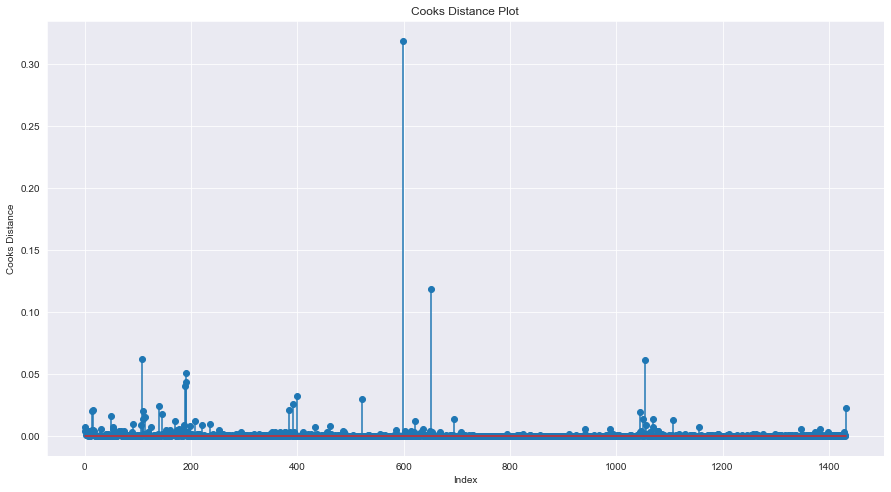

In [72]:
figure = plt.figure(figsize =(15,8))
plt.stem(np.arange(len(model7)),np.round(c3,3))
plt.title("Cooks Distance Plot")
plt.xlabel("Index")
plt.ylabel("Cooks Distance")

In [73]:
np.argmax(c3),np.max(c3) #Since the value is <1 , we can stop the diagnostic process and finalize the model

(599, 0.31882823194752186)

In [74]:
final_ml_cc_qt= smf.ols('Price~Age+KM+HP+QT+Weight',data = model7).fit()

In [75]:
(final_ml_cc_qt.rsquared,final_ml_cc_qt.aic)

(0.8711994115950206, 24628.423763082286)

In [76]:
y_pred = final_ml_cc_qt.predict(model7)

In [77]:
y_pred

0       16718.609797
1       16169.303823
2       16713.976378
3       16348.277678
4       16195.767102
            ...     
1428     8750.405694
1429     8211.097246
1430     8369.382241
1431     8487.788524
1432    11060.611687
Length: 1433, dtype: float64

In [78]:
new_data=pd.DataFrame({'Age':40,"KM":4500,"HP":120,"Weight":1035,"cc":1700,'QT': 70},index=[1])

In [79]:
final_ml_cc_qt.predict(new_data)

1    13652.307327
dtype: float64